In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('../input/Bograd_PISY_normalized.xlsx')

In [57]:
trees = ['pisy_01a', 'pisy_01b', 'pisy_02a', 'pisy_03a', 'pisy_07a', 'pisy_12b', 'pisy_14a']
trees_numbers = {k: v for k, v in zip(trees, [f'Tree {i}' for i in range(1,8)])}
columns = {_:f'D{__}' if __<16 else f'CWT{__-15}' for _, __ in zip(range(2,32), range(1,31))}
columns[0] = 'Tree'
columns[1] = 'Year'

In [62]:
def make_fig():
    fig, ax = plt.subplots(nrows=5, ncols=2, dpi=300, figsize=(10, 20))
    # plt.subplots_adjust(bottom=.03, top=.95, hspace=.15, wspace=.2)
    gs = ax[4, 0].get_gridspec()
    # remove the underlying axes
    ax[4,0].remove()
    ax[4,1].remove()
    ax_big = fig.add_subplot(gs[4, 0:])

    fig.tight_layout()
    plt.close(fig)
    return fig, ax, ax_big

fig_A, ax_A, ax_big_A = make_fig()
fig_B, ax_B, ax_big_B = make_fig()

In [63]:
mean_objects_years = dict()
to_plot = True


for year in set(df['Year']):
    temp_data = df[df['Year']==year]
    if len(temp_data) > 3:
        mean_objects_years[year] = temp_data.mean()[1:]
        if to_plot:
            for _, el in temp_data.iterrows():
                ax_A[0,0].plot(el[2:17], c='gray', label=trees_numbers[el[0]])
            ax_A[0,0].plot(mean_objects_years[year][:15], color='black', lw=2, label='Mean')
            ax_A[0,0].legend(frameon=False)
            ax_A[0,0].set_title(f'Year {year}')
            for _, el in temp_data.iterrows():
                ax_A[0,1].plot([f'C{j}' for j in range(1,16)], el[17:32], c='gray', label=trees_numbers[el[0]])
            ax_A[0,1].plot([f'C{j}' for j in range(1,16)], mean_objects_years[year][15:], color='black', lw=2, label='Mean')
            ax_A[0,1].legend(frameon=False)
            ax_A[0,1].set_title(f'Year {year}')
            to_plot = False


mean_objects_trees = dict()

for tree in set(df['Tree']):
    mean_objects_trees[tree] = df[df['Tree']==tree].mean()[1:]

In [ ]:
global_mean = df.mean()[1:]

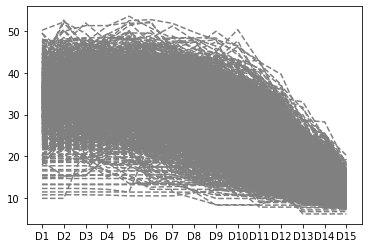

In [65]:
for _, row in df.iterrows():
    plt.plot(row[2:17], '--', color='gray')

In [ ]:
quotient_deviation_df_A = []

_columns = {_:f'D{_}' if _<16 else f'CWT{_-15}' for _ in  range(1,31)}
_columns[0] = 'Year'

for year, mean_obj in mean_objects_years.items():
    quotient_deviation_df_A += [[year] + list(mean_obj/global_mean)]

quotient_deviation_df_A = pd.DataFrame(quotient_deviation_df_A).rename(columns=_columns)

In [ ]:
qd_df_B = []

quotient_deviation_df_B = dict()


for _, row in df.iterrows():
    qd_df_B += [[row[0], row[1]] + list(row[2:] / mean_objects_trees[row[0]])]

qd_df_B = pd.DataFrame(qd_df_B).rename(columns=columns)

for year in set(df['Year']):
    temp_data_q = qd_df_B[qd_df_B['Year']==year]
    if len(temp_data_q) > 3:
        quotient_deviation_df_B[year] = temp_data_q.mean()[1:]

quotient_deviation_df_B = pd.DataFrame(quotient_deviation_df_B).transpose()